In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

def rgb_to_grayscale(images):
    # Convert 3-channel RGB images to 1-channel Grayscale
    return tf.image.rgb_to_grayscale(images)

# Set paths to your data
train_data_dir = './train'
validation_data_dir = './test'

# Image Parameters
img_height, img_width = 32,32
batch_size = 32

# Data Augmentation and Normalization
train_datagen = ImageDataGenerator(rescale=1./255,
                                    preprocessing_function=rgb_to_grayscale, 
                                   rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.1)

validation_datagen = ImageDataGenerator(rescale=1./255,
                                         preprocessing_function=rgb_to_grayscale)

# Loading Data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')

# Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),  # Change input shape to 1-channel
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(46, activation='softmax')  
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

# Save the model
model.save('nepali_alphabet_classifier.h5')

Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.
Epoch 1/20


NotFoundError: Graph execution error:

Detected at node 'sequential_1/conv2d_3/Relu' defined at (most recent call last):
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\tornado\platform\asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\IPython\core\interactiveshell.py", line 3048, in run_cell
      result = self._run_cell(
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\IPython\core\interactiveshell.py", line 3103, in _run_cell
      result = runner(coro)
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\IPython\core\interactiveshell.py", line 3308, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\IPython\core\interactiveshell.py", line 3490, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\TCS\AppData\Local\Temp\ipykernel_36720\2806018624.py", line 66, in <module>
      history = model.fit(
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "c:\Users\TCS\anaconda3\envs\hackademia\lib\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'sequential_1/conv2d_3/Relu'
No algorithm worked!  Error messages:
	 [[{{node sequential_1/conv2d_3/Relu}}]] [Op:__inference_train_function_3765]

In [3]:
model = tf.keras.models.load_model('nepali_alphabet_classifier.h5')

In [4]:
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt

def convert_to_rgb(img):
    if img.shape != (32, 32):
        raise ValueError(f"Expected input shape (32, 32), but got {img.shape}")
    
    # Add the channel dimension (32, 32, 1)
    img_with_channel = np.expand_dims(img, axis=-1)
    
    # Repeat the single channel 3 times to make it 3 channels
    img_rgb = np.repeat(img_with_channel, 3, axis=-1)
    
    return img_rgb

def invert_image(image_path):
    # Step 1: Load the image
    image = cv2.imread(image_path)

    # Step 2: Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 3: Apply a binary threshold to make text white and background black
    # The threshold value (150) can be adjusted based on the image quality
    _, binary_image = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Step 4: Invert the binary image (so text becomes white, background becomes black)
    inverted_image = cv2.bitwise_not(binary_image)
    
    # Step 5: Resize the image to 32x32
    resized_image = cv2.resize(inverted_image, (32, 32))

    # Step 6: Expand the grayscale image to 3 channels
    rgb_image = np.stack([resized_image] * 3, axis=-1)  # Convert 1 channel to 3 channels by stacking

    # Step 7: Expand dimensions to match model input shape and normalize
    img_array = np.expand_dims(rgb_image, axis=0)  # (1, 32, 32, 3)
    img_array = img_array / 255.0  # Normalize pixel values (0-1)

    return img_array


# Function to load and preprocess image for prediction
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))  # Resize to match model input size
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match model input shape (1, 64, 64, 3)
    img_array = img_array / 255.0  # Normalize pixel values
    return img_array

# Inference: Get confidence scores for each alphabet class
def predict_alphabet(img_path):
    # Load and preprocess image
    # image_ = invert_image(img_path)
    image_ = load_and_preprocess_image(img_path)
    
    # Make prediction
    predictions = model.predict(image_)
    
    # Confidence scores for all classes
    confidence_scores = predictions[0]
    
    # Get predicted class (the class with the highest confidence score)
    predicted_class = np.argmax(confidence_scores)
    
    # Display the prediction and confidence scores
    print(f'Predicted Class: {predicted_class}')
    print('Confidence Scores for each class:')
    for idx, score in enumerate(confidence_scores):
        print(f'Alphabet {idx}: {score*100:.2f}%')

    # Optional: Plot image and top prediction
    # img = image.load_img(img_path)
    plt.imshow(image_[0])
    plt.title(f"Predicted Alphabet: {predicted_class} with Confidence: {np.max(confidence_scores) * 100:.2f}%")
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 28ms/step
Predicted Class: 41
Confidence Scores for each class:
Alphabet 0: 0.01%
Alphabet 1: 0.00%
Alphabet 2: 0.00%
Alphabet 3: 0.00%
Alphabet 4: 0.00%
Alphabet 5: 0.00%
Alphabet 6: 0.00%
Alphabet 7: 0.00%
Alphabet 8: 0.00%
Alphabet 9: 0.00%
Alphabet 10: 0.00%
Alphabet 11: 0.99%
Alphabet 12: 0.00%
Alphabet 13: 0.00%
Alphabet 14: 0.07%
Alphabet 15: 0.00%
Alphabet 16: 0.00%
Alphabet 17: 0.00%
Alphabet 18: 0.00%
Alphabet 19: 0.00%
Alphabet 20: 0.00%
Alphabet 21: 0.00%
Alphabet 22: 0.00%
Alphabet 23: 0.09%
Alphabet 24: 0.00%
Alphabet 25: 0.00%
Alphabet 26: 0.00%
Alphabet 27: 0.00%
Alphabet 28: 0.00%
Alphabet 29: 0.00%
Alphabet 30: 0.00%
Alphabet 31: 0.00%
Alphabet 32: 0.00%
Alphabet 33: 0.00%
Alphabet 34: 0.00%
Alphabet 35: 0.00%
Alphabet 36: 0.00%
Alphabet 37: 0.00%
Alphabet 38: 0.00%
Alphabet 39: 0.00%
Alphabet 40: 0.00%
Alphabet 41: 51.40%
Alphabet 42: 0.00%
Alphabet 43: 47.44%
Alphabet 44: 0.00%
Alphabet 45: 0.00%


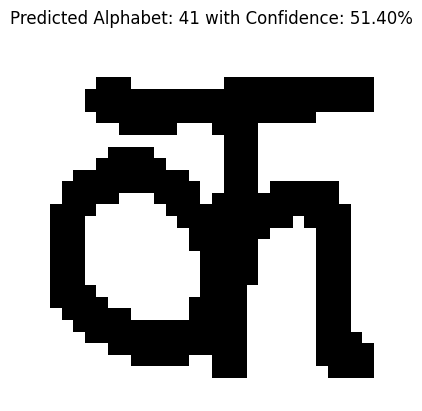

In [6]:
test_image_path = r"test/1/image_4500.png"
predict_alphabet(test_image_path)

(32, 32, 3)


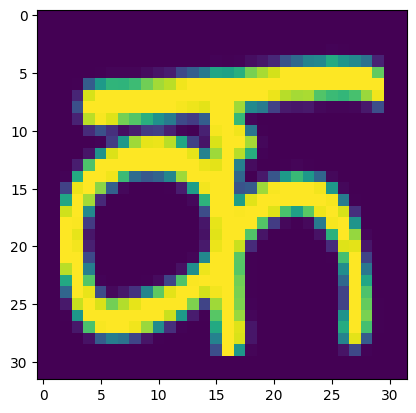

In [27]:
path = r"train\1\image_25500.png"
image = cv2.imread(path)
print(image.shape)
plt.imshow(image[:, :,2])